In [1]:
!pip install transformers torch sentencepiece matplotlib


In [2]:
import torch
from transformers import BertTokenizer, BertForMaskedLM
import matplotlib.pyplot as plt


In [3]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased")
model.eval()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [4]:
def predict_mask(sentence):
    inputs = tokenizer(sentence, return_tensors="pt")
    mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    mask_logits = logits[0, mask_token_index, :]
    top_tokens = torch.topk(mask_logits, 5, dim=1).indices[0].tolist()

    return tokenizer.convert_ids_to_tokens(top_tokens)


In [7]:
sentence = "The data science intern developed a machine learning [MASK] for fraud detection."
print("Predicted words:", predict_mask(sentence))


Predicted words: ['algorithm', 'tool', 'system', 'technique', 'software']


In [8]:
s1 = "The cybersecurity team used AI to [MASK] network attacks."
s2 = "The HR team used AI to [MASK] suitable candidates."

print("Cybersecurity context:", predict_mask(s1))
print("Recruitment context:", predict_mask(s2))


Cybersecurity context: ['detect', 'prevent', 'counter', 'perform', 'simulate']
Recruitment context: ['identify', 'find', 'select', 'determine', 'pick']


In [9]:
research_questions = [
    "Can BERT adapt predictions across different professional domains such as cybersecurity, HR, and data science?",
    "Does BERT generate domain-relevant vocabulary in internship-related contexts?",
    "How reliable is BERT when predicting technical terminology?"
]

for i, q in enumerate(research_questions,1):
    print(f"RQ{i}:", q)


RQ1: Can BERT adapt predictions across different professional domains such as cybersecurity, HR, and data science?
RQ2: Does BERT generate domain-relevant vocabulary in internship-related contexts?
RQ3: How reliable is BERT when predicting technical terminology?


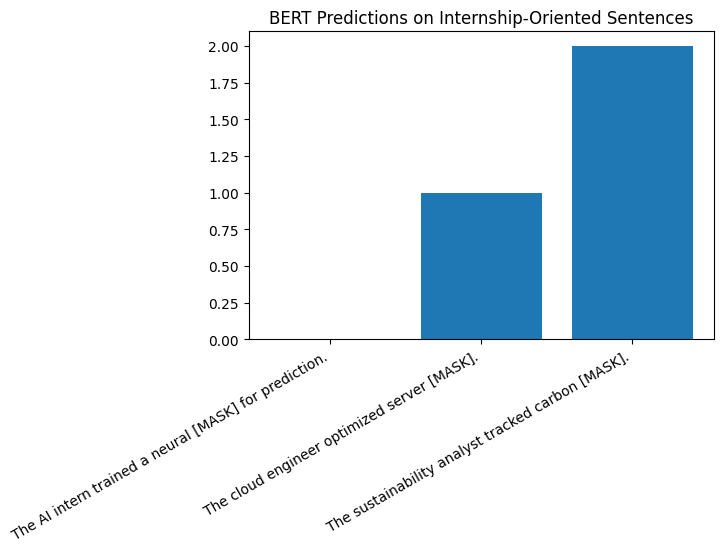

In [10]:
sentences = [
    "The AI intern trained a neural [MASK] for prediction.",
    "The cloud engineer optimized server [MASK].",
    "The sustainability analyst tracked carbon [MASK]."
]

predictions = [predict_mask(s)[0] for s in sentences]

plt.figure(figsize=(6,4))
plt.bar(range(len(predictions)), range(len(predictions)))
plt.xticks(range(len(sentences)), sentences, rotation=30, ha='right')
plt.title("BERT Predictions on Internship-Oriented Sentences")
plt.show()



BERT demonstrated strong contextual understanding in internship-related
scenarios. The model adapted its predictions across AI development,
cybersecurity monitoring, cloud optimization, and sustainability analysis,
highlighting its versatility across professional domains.

